<a href="https://colab.research.google.com/github/Nabeeha-Shafiq/22i-2336_Z_ML_A2/blob/main/22i_2336_Z_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

before we get into implementing lets first understand types of gradient descent

Stochastic Gradient Descent :

For every row we calculate parameters/weights (via that derivaition formula) and then we update weights using weight update equation and then we calculate error ,classic !
more variance (more changes alongside)
less convergence (it keeps on recalculating the best fit , so does nto approaches perfection smoothly)

Batch Gradient Descent :

All our formulas imagine a summation of all rows along standard formulas , so we find weights for all of data , update , find error of whole data , all of data is taken as 1 batch
less varaince obv
but alot of data processed at every epochs so resource utilization high
better smoother convergence

MiniBatch Gradient Descent :

The best of both worlds , combines the updations/feedback of stochastic with data convergence and low variance of batch
divides data into batches , in context of model batch ho raha
in context of batches batch gD ho raha if that makes any sense

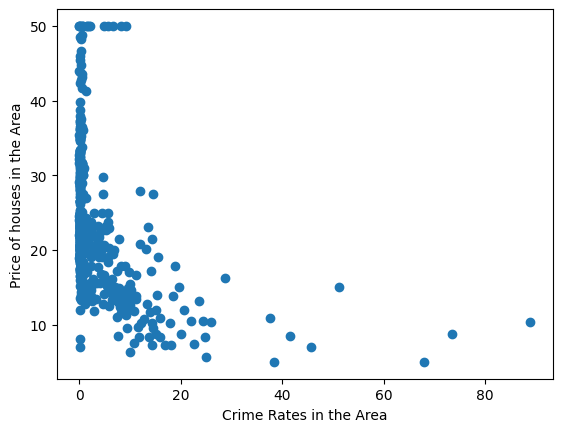

In [ ]:
#using clssic boston housing data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn.datasets import load_boston

#dataBoston=load_boston()
#df=pd.Dataframe(dataBoston.data,columns=dataBoston.feature_names)
data_url = "http://lib.stat.cmu.edu/datasets/boston"
df_raw = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([df_raw.values[::2, :], df_raw.values[1::2, :2]])
target = df_raw.values[1::2, 2]

# Create a complete DataFrame with features and target
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_complete = pd.DataFrame(data, columns=columns[:-1])
df_complete['MEDV'] = target

X=df_complete[['CRIM']]
y=df_complete['MEDV']

plt.scatter(X,y)
plt.xlabel('Crime Rates in the Area')
plt.ylabel('Price of houses in the Area')
plt.show()

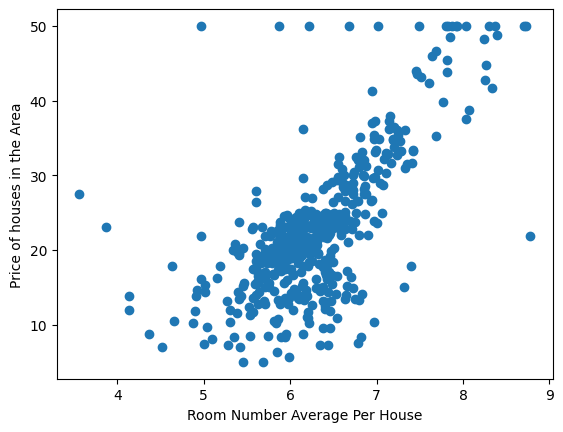

In [ ]:
X=df_complete[['RM']]
y=df_complete['MEDV']

plt.scatter(X,y)
plt.xlabel('Room Number Average Per House')
plt.ylabel('Price of houses in the Area')
plt.show()

Learning Rate: 0.001, Coefficient: 6.644964104602387, MSE: 46.181549414028126, Convergence Speed: 19 epochs
Learning Rate: 0.01, Coefficient: 6.982690547398412, MSE: 46.828778576801454, Convergence Speed: 3 epochs
Learning Rate: 0.1, Coefficient: 6.972825248834758, MSE: 46.92868975753459, Convergence Speed: 1 epochs


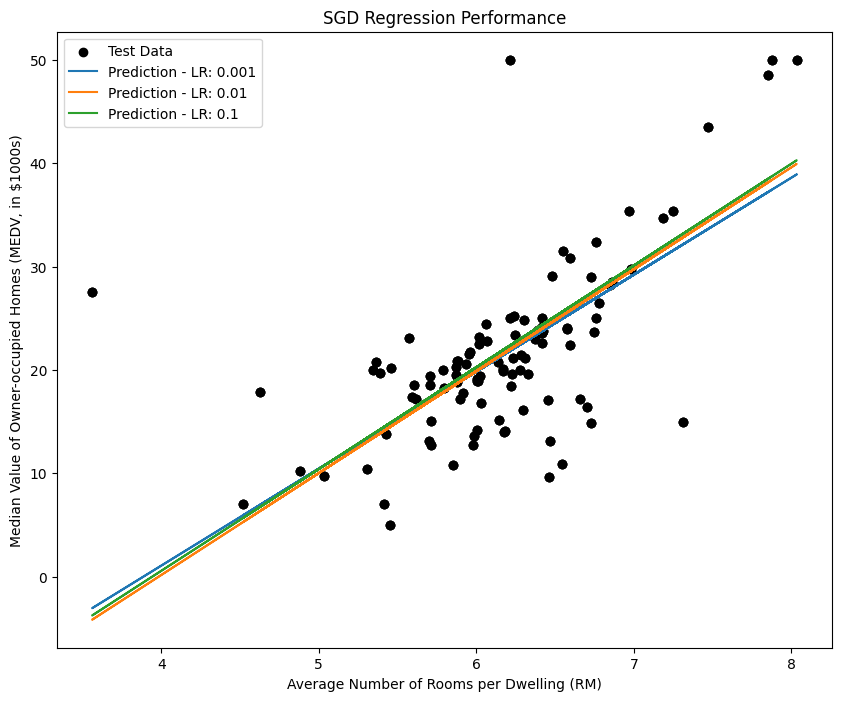

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
X = df_complete[['RM']].values
y = df_complete['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def train_and_evaluate_sgd(eta0):
    sgd_regressor = SGDRegressor(max_iter=1, tol=None, eta0=eta0, learning_rate='constant', penalty=None, random_state=42)
    prev_mse = float('inf')
    epoch_count = 0
    for _ in range(1000):
        sgd_regressor.partial_fit(X_train_scaled, y_train)
        y_pred = sgd_regressor.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        if abs(prev_mse - mse) < 1e-3:
            break
        prev_mse = mse
        epoch_count += 1
    return sgd_regressor.coef_[0], mse, y_pred, epoch_count

learning_rates = [0.001, 0.01, 0.1]
plt.figure(figsize=(10, 8))

for eta in learning_rates:
    coef, mse, y_pred, epochs_to_converge = train_and_evaluate_sgd(eta)
    print(f'Learning Rate: {eta}, Coefficient: {coef}, MSE: {mse}, Convergence Speed: {epochs_to_converge} epochs')
    plt.scatter(X_test, y_test, color='black', label='Test Data' if eta == 0.001 else "")
    plt.plot(X_test, y_pred, label=f'Prediction - LR: {eta}')

plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Owner-occupied Homes (MEDV, in $1000s)')
plt.title('SGD Regression Performance')
plt.legend()
plt.show()


Learning Rate: 0.001, Coefficient: 6.644964104602387, MSE: 46.181549414028126, Converged in: 19 epochs
Learning Rate: 0.01, Coefficient: 6.982690547398412, MSE: 46.828778576801454, Converged in: 3 epochs
Learning Rate: 0.1, Coefficient: 6.972825248834758, MSE: 46.92868975753459, Converged in: 1 epochs


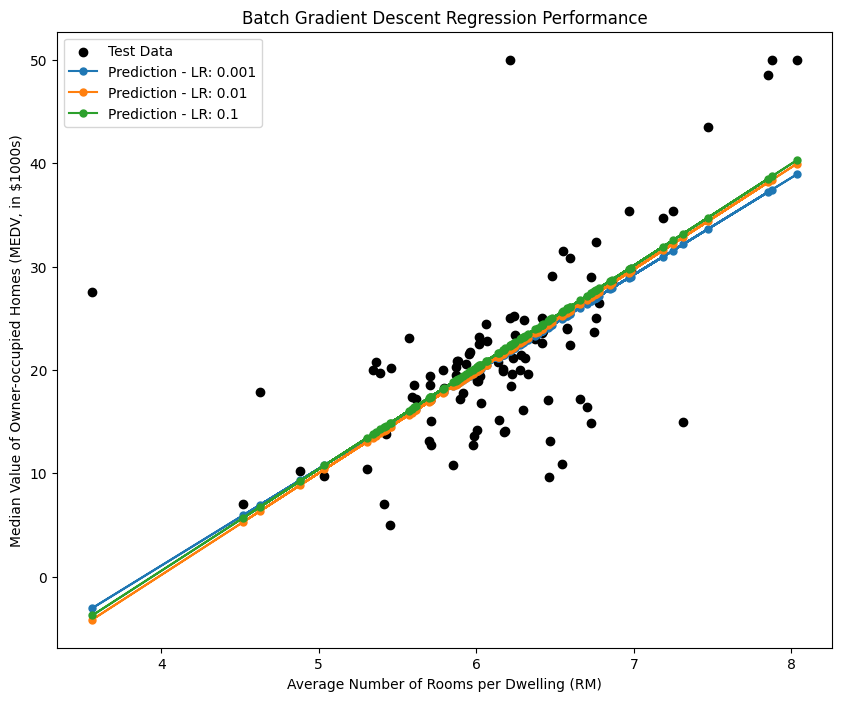

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = df_complete[['RM']].values
y = df_complete['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def train_and_evaluate_batch_gd(eta0, epochs=1000):
    sgd_regressor = SGDRegressor(max_iter=1, tol=None, eta0=eta0, learning_rate='constant', penalty=None, random_state=42)
    prev_mse = float('inf')
    epoch_count = 0
    mse_changes = []
    for _ in range(epochs):
        sgd_regressor.partial_fit(X_train_scaled, y_train)
        y_pred = sgd_regressor.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        if abs(prev_mse - mse) < 1e-3:
            break
        prev_mse = mse
        mse_changes.append(mse)
        epoch_count += 1
    return sgd_regressor.coef_[0], mse, y_pred, epoch_count

learning_rates = [0.001, 0.01, 0.1]

plt.figure(figsize=(10, 8))
plt.scatter(X_test, y_test, color='black', label='Test Data')

for eta in learning_rates:
    coef, mse, y_pred, epochs_to_converge = train_and_evaluate_batch_gd(eta)
    print(f'Learning Rate: {eta}, Coefficient: {coef}, MSE: {mse}, Converged in: {epochs_to_converge} epochs')
    plt.plot(X_test, y_pred, label=f'Prediction - LR: {eta}', marker='o', linestyle='-', markersize=5)

plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Owner-occupied Homes (MEDV, in $1000s)')
plt.title('Batch Gradient Descent Regression Performance')
plt.legend()
plt.show()


Learning Rate: 0.001, Batch Size: 20, Coefficient: 6.592175159418324, MSE: 46.119471816366485, Converged in: 13 epochs
Learning Rate: 0.001, Batch Size: 50, Coefficient: 6.626841984488816, MSE: 46.1499425217301, Converged in: 18 epochs
Learning Rate: 0.001, Batch Size: 100, Coefficient: 6.6134200575600754, MSE: 46.12845579700517, Converged in: 18 epochs
Learning Rate: 0.01, Batch Size: 20, Coefficient: 6.673772976165196, MSE: 46.2277581398566, Converged in: 2 epochs
Learning Rate: 0.01, Batch Size: 50, Coefficient: 6.774783806470219, MSE: 46.40979818891652, Converged in: 2 epochs
Learning Rate: 0.01, Batch Size: 100, Coefficient: 6.710043390460343, MSE: 46.35034338763219, Converged in: 2 epochs
Learning Rate: 0.1, Batch Size: 20, Coefficient: 5.663360139945026, MSE: 45.919936784278015, Converged in: 1 epochs
Learning Rate: 0.1, Batch Size: 50, Coefficient: 5.727612231451865, MSE: 45.75103275267426, Converged in: 1 epochs
Learning Rate: 0.1, Batch Size: 100, Coefficient: 5.5405396070230

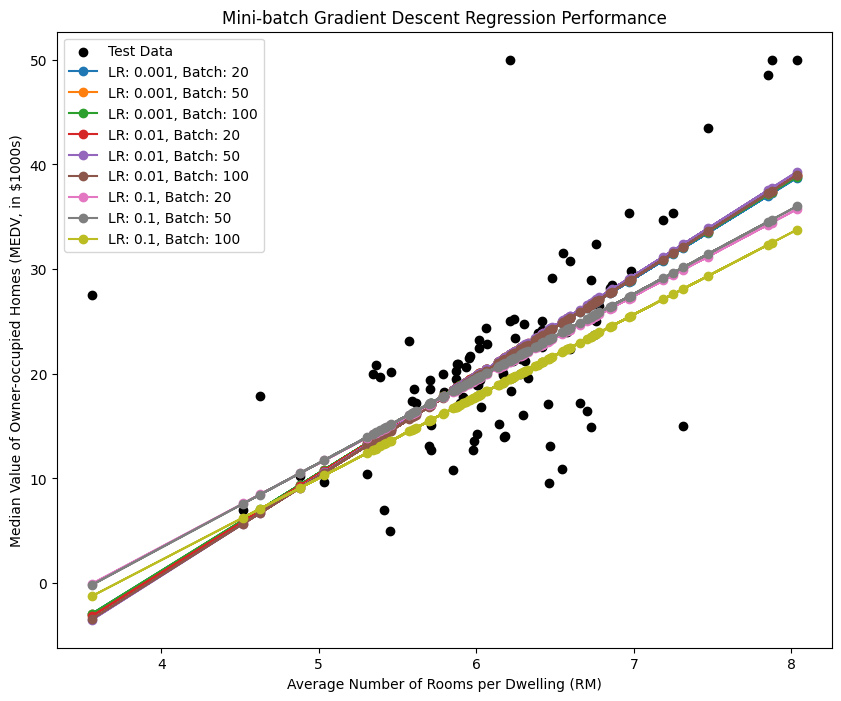

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = df_complete[['RM']].values
y = df_complete['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def train_and_evaluate_mini_batch_gd(eta0, batch_size, epochs=1000):
    sgd_regressor = SGDRegressor(max_iter=1, tol=None, eta0=eta0, learning_rate='constant', penalty=None, random_state=42)
    prev_mse = float('inf')
    epoch_count = 0
    for _ in range(epochs):
        n_batches = int(np.ceil(len(X_train_scaled) / batch_size))
        for i in range(n_batches):
            start_i = i * batch_size
            end_i = start_i + batch_size
            X_batch = X_train_scaled[start_i:end_i]
            y_batch = y_train[start_i:end_i]
            sgd_regressor.partial_fit(X_batch, y_batch)
        y_pred = sgd_regressor.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        if abs(prev_mse - mse) < 1e-3:
            break
        prev_mse = mse
        epoch_count += 1
    return sgd_regressor.coef_[0], mse, y_pred, epoch_count

learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [20, 50, 100]

plt.figure(figsize=(10, 8))
plt.scatter(X_test, y_test, color='black', label='Test Data')

for eta in learning_rates:
    for batch_size in batch_sizes:
        coef, mse, y_pred, epochs_to_converge = train_and_evaluate_mini_batch_gd(eta, batch_size)
        print(f'Learning Rate: {eta}, Batch Size: {batch_size}, Coefficient: {coef}, MSE: {mse}, Converged in: {epochs_to_converge} epochs')
        plt.plot(X_test, y_pred, 'o', linestyle='-', label=f'LR: {eta}, Batch: {batch_size}')

plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Owner-occupied Homes (MEDV, in $1000s)')
plt.title('Mini-batch Gradient Descent Regression Performance')
plt.legend()
plt.show()


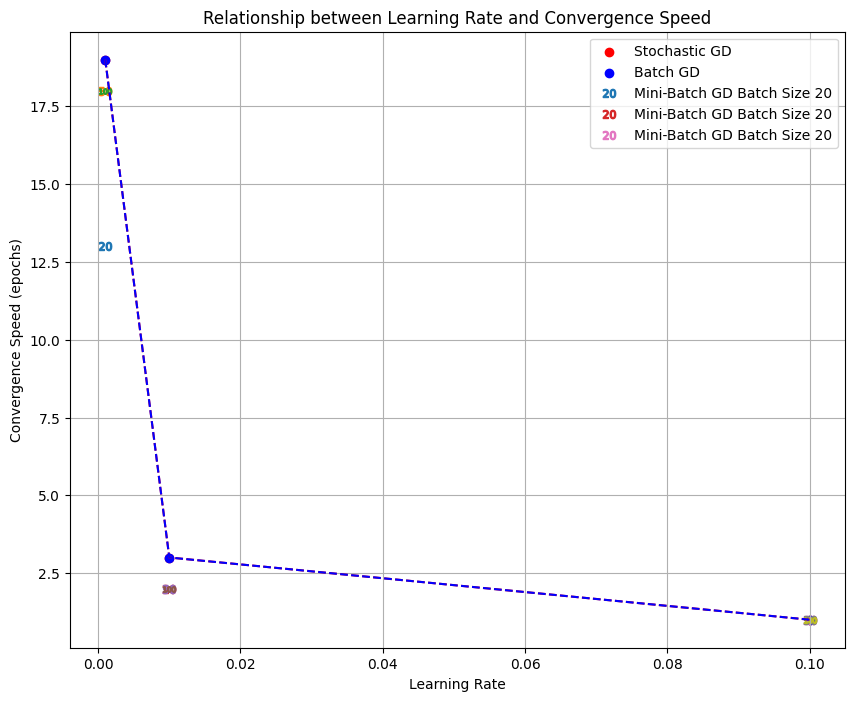

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#all these vlues are taken from results above
sgd_learning_rates = np.array([0.001, 0.01, 0.1])
sgd_convergence_speeds = np.array([19, 3, 1])
bgd_learning_rates = np.array([0.001, 0.01, 0.1])
bgd_convergence_speeds = np.array([19, 3, 1])
mbgd_learning_rates = np.array([0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1])
mbgd_convergence_speeds = np.array([13, 18, 18, 2, 2, 2, 1, 1, 1])
mbgd_batch_sizes = np.array([20, 50, 100, 20, 50, 100, 20, 50, 100])
plt.figure(figsize=(10, 8))
plt.scatter(sgd_learning_rates, sgd_convergence_speeds, color='red', label='Stochastic GD')
plt.plot(sgd_learning_rates, sgd_convergence_speeds, 'r--')
plt.scatter(bgd_learning_rates, bgd_convergence_speeds, color='blue', label='Batch GD')
plt.plot(bgd_learning_rates, bgd_convergence_speeds, 'b--')

for i, batch_size in enumerate(mbgd_batch_sizes):
    plt.scatter(mbgd_learning_rates[i], mbgd_convergence_speeds[i], marker='${}$'.format(batch_size), s=80, label=f'Mini-Batch GD Batch Size {batch_size}' if i in [0, 3, 6] else "")
plt.xlabel('Learning Rate')
plt.ylabel('Convergence Speed (epochs)')
plt.title('Relationship between Learning Rate and Convergence Speed')
plt.legend()
plt.grid(True)
plt.show()


Analysis :

For all type of gradient descents a higher learning rate ie 0.1 always gave us better results in context of convergence speed , speed is best

Learning rate increase convergence speed increase  

But if you want a better accuracy / precision of model a learning rate if 0.01 is good enough it,s a tradeoff between speed and accuracy

Having a smaller batch size in mini batch gradient descent is better for speed and mse both but batch size is secondary to learning rate

Having a very high learning rate in mini batch with a high batch number gave us a relatively high mse so accuracy of model is affected
